# One-Class SVM Implementation in Python

#### One Class SVM
One class SVM (Support Vector Machine) is an algorithm for anomaly detection that identifies data points that differ significantly from the normal distributon of data. It's particulaly useful when the dataset primarily consisits of one class, and we want to detect outliers. One Class-SVM separates the data into a high density region (normal data) and sparse regions (anomalies).

Predictions: [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1 -1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


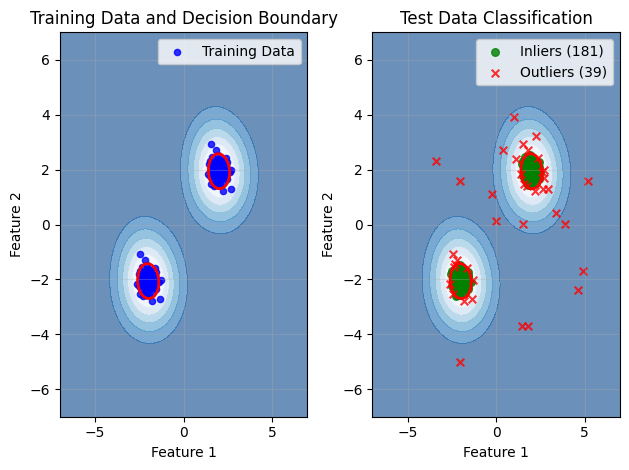

Total test points: 220
Inliers: 181 (82.3%)
Outliers: 39 (17.7%)
Predictions: [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1 -1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


In [5]:
# import necessary libraries
from sklearn.svm import OneClassSVM
import numpy as np

# sample data (normal data points clustered around 0)
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2] # create a dataset with points around two clusters

# new test data with some outliers
X_test = np.r_[X+2, X-2, np.random.uniform(low=-6, high=6, size=(20, 2))] # create a dataset with points around two clusters

# initialise and train the model
model = OneClassSVM(gamma='auto', nu=0.1)
model.fit(X_train)

# predict on test data (-1 indicates outlier, 1 indicates inlier)
predictions = model.predict(X_test)

# display predictions
print("Predictions:", predictions)

# Create a mesh to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.decision_function(mesh_points)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt
# Plot 1: Training data and decision boundary
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap='Blues_r', alpha=0.6)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.scatter(X_train[:, 0], X_train[:, 1], c='blue', s=20, alpha=0.8, label='Training Data')
plt.title('Training Data and Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)

#Plot 2: Test predictions
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap='Blues_r', alpha=0.6)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')

# Separate inliers and outliers
inliers = X_test[predictions == 1]
outliers = X_test[predictions == -1]

plt.scatter(inliers[:, 0], inliers[:, 1], c='green', s=30, alpha=0.8, 
           label=f'Inliers ({len(inliers)})', marker='o')
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', s=30, alpha=0.8, 
           label=f'Outliers ({len(outliers)})', marker='x')

plt.title('Test Data Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print(f"Total test points: {len(X_test)}")
print(f"Inliers: {len(inliers)} ({len(inliers)/len(X_test)*100:.1f}%)")
print(f"Outliers: {len(outliers)} ({len(outliers)/len(X_test)*100:.1f}%)")
print(f"Predictions: {predictions}")